<h2>Smart Grocery User History Analysis</h2>

_____

The following code demonstrates a recommendation system for purchasing items based on historical data. It utilizes a TensorFlow model to predict the most recent item recommendation based on the provided date. The code reads a dataset containing purchase information, preprocesses the data, builds and trains a neural network model, and provides item recommendations for a given date. The model is evaluated, and the loss values are visualized using matplotlib. Additionally, the code includes a function to retrieve the top six recommendations based on the predictions.




# Libraries Imported
____________________
To run the code successfully, you need to have the following dependencies installed:

- **tensorflow** (as *tf*) : A library for building and training machine learning models.
- **pandas** (as *pd*) : A library for data manipulation and analysis.
- **matplotlib.pyplot** (as *plt*) : A library for creating visualizations.
- **numpy** (as *np*) : A library for mathematical operations on arrays.
- **datetime** : A library for manipulating dates and times.
- **sklearn.preprocessing.LabelEncoder** : A class for converting categorical labels into numerical values.

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

### Reading and Preprocessing the Dataset

_____
1. The code reads a dataset from a CSV file named **'Book2.csv'*** using the pd.read_csv() function and stores it in a DataFrame called **df***.

2. The column 'Item Pembelian' is converted to a string data type using the **astype()*** method.

3. The column 'Tanggal Pembelian' is converted to a pandas **Datetime** data type using the **pd.to_datetime()** function, specifying the day comes first in the format.

4. The 'Tanggal Pembelian' column is further converted to a numerical representation by applying the **toordinal()** method to each date value and storing the result in a new column called 'Tanggal Numerik'.

In [3]:
# Membaca dataset dan mengubah format tanggal
df = pd.read_csv('Book2.csv', delimiter=';')

df['Item Pembelian']=df['Item Pembelian'].astype(str)
df['Tanggal Pembelian'] = pd.to_datetime(df['Tanggal Pembelian'], dayfirst=True, format='mixed')

# Mengonversi tanggal menjadi nilai numerik yang dapat digunakan dalam model
df['Tanggal Numerik'] = df['Tanggal Pembelian'].apply(lambda x: x.toordinal())

In [4]:
print(df['Item Pembelian'])

0     makaroni
1       daging
2         ayam
3         keju
4          oil
        ...   
85       beras
86      rempah
87        gula
88        cabe
89        ikan
Name: Item Pembelian, Length: 90, dtype: object


In [5]:
print(df['Tanggal Numerik'])

0     738156
1     738276
2     738368
3     738490
4     738170
       ...  
85    738446
86    738449
87    738452
88    738455
89    738458
Name: Tanggal Numerik, Length: 90, dtype: int64


## Building the TensorFlow Model

----
1. The code defines a sequential model using **tf.keras.models.Sequential()**, which is a linear stack of layers.
2. Three dense layers are added to the model using **tf.keras.layers.Dense():**
    - The first two layers have 32 units and use the ReLU activation function.
    - The final layer has 1 unit and serves as the output layer.
3. The model is compiled using **model.compile()**, specifying the optimizer as 'adam' and the loss function as 'mean_squared_error'.

In [6]:
# Membangun model dengan TensorFlow
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Mengubah kolom inventaris menjadi array target
target = df['Item Pembelian'].values

# Mengubah kolom tanggal menjadi array fitur
features = df['Tanggal Numerik'].values.reshape((-1, 1))


# Encoding Labels and Splitting Data

___
1. The 'Item Pembelian' column is extracted from the DataFrame and converted to a NumPy array named **target**.

2. The 'Tanggal Numerik' column is extracted from the DataFrame and reshaped into a 2D array named **features**.

3. An instance of the LabelEncoder class is created and stored in label_encoder.

4. The **fit_transform()** method of **label_encoder** is applied to **target** to convert the categorical labels into numerical values, resulting in **target_encoded**.

5. The data is split into training and validation sets using a specified train_ratio:
    - *'train_size'* is calculated as the integer part of the product of *train_ratio* and the length of *features*.
    - The arrays *features_train* and *features_val* are created by splitting features accordingly.
    - The arrays target_train and target_val are created by splitting *target_encoded* accordingly.

In [ ]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Mengonversi label kategori menjadi nilai numerik
target_encoded = label_encoder.fit_transform(target)

# Memisahkan data menjadi data latih dan data validasi
train_ratio = 0.8
train_size = int(train_ratio * len(features))
features_train, features_val = features[:train_size], features[train_size:]
target_train, target_val = target_encoded[:train_size], target_encoded[train_size:]

# Training and Evaluating the Model

___

1. The model is trained using the **fit()** method, passing in **features_train** and **target_train** as training data, and **features_val** and **target_val** as validation data. The **epochs** parameter is set to 100.

2. The training loss and validation loss values for each epoch are stored in **history**.

3. The model's loss on the validation set is evaluated using **model.evaluate()**, and the result is stored in **loss**.

In [7]:
# Melatih model dengan data latih dan mengevaluasi dengan data validasi
history = model.fit(features_train, target_train, validation_data=(features_val, target_val), epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 78ms/step - loss: 101994700800.0000 - val_loss: 86996197376.0000
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 83024150528.0000 - val_loss: 69906194432.0000
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 66470010880.0000 - val_loss: 55179804672.0000
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 52256559104.0000 - val_loss: 42705510400.0000
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 40262811648.0000 - val_loss: 32329076736.0000
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 30326568960.0000 - val_loss: 23864895488.0000
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 22257225728.0000 - val_loss: 17107723264.0000
Epoch 8/100
3/3 [==============================] - 0s 15ms/step - loss: 15847085056.0000 - val_loss: 11843371008.0000
Epoch 9/100
3/3 [==============================] - 0s 1

___
### Function for Item Recommendation
___
- A function named **get_item_recommendation(date)** is defined, which takes a date as input.

- The input date is converted to a numerical format and stored in **date_numerik**.

- The DataFrame **df** is filtered to include only rows with a 'Tanggal Numerik' value less than or equal to **date_numerik**, resulting in **filtered_df**.

- The 'Tanggal Numerik' values from **filtered_df** are extracted and reshaped into a 2D array named **features**.

- The model predicts the item recommendations by passing features through the model using **model.predict**, resulting in **predictions**.

- The index of the highest predicted value for each prediction is found using **np.argmax()**, and the corresponding label is retrieved using **label_encoder.inverse_transform()**. The latest item recommendation is stored in **latest_item**.

- The latest item recommendation is returned by the function.

In [8]:
def get_item_recommendation(date):
    date_str = datetime.strptime(date, '%m/%d/%Y').strftime('%m-%d-%Y')
    date_numerik = int(datetime.strptime(date_str, '%m-%d-%Y').strftime('%Y%m%d'))
    filtered_df = df[df['Tanggal Numerik'] <= date_numerik]
    features = filtered_df['Tanggal Numerik'].values.reshape((-1, 1))
    predictions = model.predict(features)
    latest_item_indices = np.argmax(predictions, axis=1)
    latest_items = label_encoder.inverse_transform(latest_item_indices)
    latest_item = latest_items[-1]  # Get the latest item recommendation
    return latest_item

### Evaluating the Model and Printing Recommendations

- The model's loss on the validation set is already evaluated and stored in **loss**.
- The loss value is printed to the console.
- The function **get_item_recommendation()** is called with a specified date, and the returned latest item recommendation is stored in **latest_item**.
- The specified date and the latest item recommendation are printed to the console.

### Plotting the Model's Loss
- The training loss and validation loss values stored in **'history'*** are plotted using **'plt.plot()'***
- The plot is given a title and labeled on the x and y axes.
- A legend is added to differentiate the training loss and validation loss lines.
- The plot is displayed using **'plt.show()'**

1/1 [==============================] - 0s 25ms/step - loss: 13.4620
Loss: 13.461968421936035


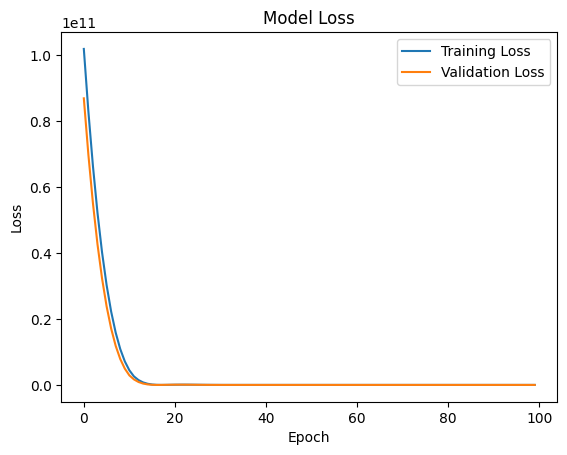

In [9]:
# Evaluasi model
loss = model.evaluate(features_val, target_val)
print(f"Loss: {loss}")

# Plot hasil evaluasi
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Getting Recommendations
- A new column named 'Rekomendasi' is added to **df**, which stores the rounded prediction value for each 'Tanggal Numerik'.
- **df** is sorted in descending order based on the 'Rekomendasi' column and the top 6 rows, specifically the 'Item Pembelian' column, are selected. These recommendations are stored in top rekomendtion.

In [15]:
# Contoh penggunaan
date = '07/30/2022'
latest_item = get_item_recommendation(date)
print(f"Item yang harus dibeli pada tanggal {date}: {latest_item}")

3/3 [==============================] - 0s 6ms/step
Item yang harus dibeli pada tanggal 07/30/2022: ayam


In [25]:
# Mendapatkan rekomendasi top 6
df['Rekomendasi'] = df['Tanggal Numerik'].apply(lambda x: round(model.predict([[x]])[0][0]))
top_10_rekomendasi = df.sort_values('Rekomendasi', ascending=False).head(10)[['Item Pembelian']]

1/1 [==============================] - 0s 39ms/step


In [26]:
print("Rekomendasi Top 10:")
print(top_10_rekomendasi)

Rekomendasi Top 10:
   Item Pembelian
0        makaroni
67           gula
65          beras
64            oil
63           susu
62           ayam
61         daging
60          telur
59           ikan
58           cabe


## Saving the Model to H5pickle (HDF5 Format)
T- he code saves the model to the H5pickle format using the **save()** method of the model object.

- The **model.save()** function is used to save the model to the specified file **'User_History_Analisys.h5'**.
- The model is saved in the HDF5 format, which is a file format designed to store and organize large amounts of numerical data.
- The saved model includes the model architecture, model weights, optimizer state, and any additional configuration specified during model compilation.

In [13]:
#save model to h5
import pickle

model.save('User_History_Analisys.h5')



## Saving the Model to Pickle
1. The code saves the model to a pickle file using the **pickle.dump()** function.
- The **pickle.dump()** function is used to serialize the model object and save it to the specified file 'model.pickle'.
- The file is opened in write-binary mode ('wb') to ensure compatibility with binary data.
2. It's important to note that the HDF5 format (H5pickle) is typically used for saving the model architecture and weights, while the pickle format is more suitable for saving the entire model object.

In [14]:
#save model to pickle
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)
f.close()